In [14]:
import cv2
import mediapipe as mp
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

In [3]:

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
  
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_CONTOURS)  # Draw face contours

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Draw pose connections

    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw left hand connections

    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)  # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks,  mp_face_mesh.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 ) 
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 ) 
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 ) 
    # Draw right hand connections 
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 ) 

In [10]:
def play_video_in_notebook(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Error: Could not open video {video_path}.")
        return
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    if fps == 0:
        fps = 25  # Default FPS if not detected
        print("Warning: FPS not detected. Defaulting to 25 FPS.")
    frame_delay = 1 / fps
    
    plt.figure(figsize=(8, 6))
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            print("End of video or cannot read the frame.")
            break
        
        # Convert BGR (OpenCV) to RGB (matplotlib)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Display the frame
        plt.imshow(frame_rgb)
        plt.axis('off')
        display(plt.gcf())
        clear_output(wait=True)
        
        # Delay to match the video's FPS
        time.sleep(frame_delay)
    
    cap.release()
    print("Video playback finished.")


KeyboardInterrupt: 

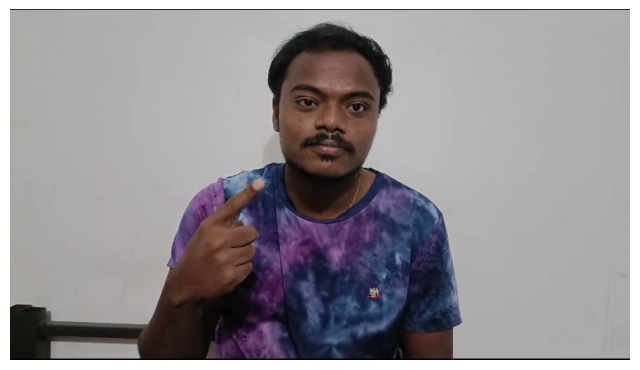

In [15]:
play_video_in_notebook(r"C:\Users\MAHIREDDY\Desktop\Sign_language_recognition\dataset\ARE\WhatsApp Video 2024-09-26 at 10.40.13 PM (1).mp4")

In [7]:
cap = cv2.VideoCapture('Desktop/Sign_language_recognition/dataset/ARE/WhatsApp Video 2024-09-26 at 10.40.13 PM (1).mp4')
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1000)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 600)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        # frame=cv2.resize(frame,(1000,700))
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [15]:
def key_points_extraction(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 
keys_list = [
    "I",
    "You",
    "We",
    "Are",
    "Hello",
    "Thank You",
    "Sorry",
    "What",
    "Eat",
    "Water",
    "Family",
    "Help"
]

# Actions that we try to detect
actions = np.array(keys_list)

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass